# Rossmann Store Sales



# Bibliotheken importieren



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

C:\tools\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\tools\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\tools\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Daten importieren

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype

# pd.set_option('display.max_columns', None)

dtypes_train = {
    'Store' : 'int',
    'DayOfWeek' : 'category',
    'Sales' : 'int',
    'Customers' : 'int',
    'Open' : 'bool',
    'Promo' : 'bool',
    'StateHoliday' : 'category',
    'SchoolHoliday' : 'bool'
}
train = pd.read_csv('train.csv', parse_dates = ['Date'], dtype = dtypes_train)
# display(train.info())
# display(train.head())

dtypes_store = {
    'Store' : 'int',
    'StoreType' : 'category',
    'Assortment' : 'category',
    'CompetitionDistance' : 'object',
    'CompetitionOpenSinceMonth' : 'object',
    'CompetitionOpenSinceYear' : 'object',
    'Promo2' : 'bool',
    'Promo2SinceWeek' : 'object',
    'Promo2SinceYear' : 'object',
    'PromoInterval' : 'object'
}

store = pd.read_csv('store.csv', dtype = dtypes_store)
# display(store.info())
# display(store.head())

demand = train.merge(store, how = 'inner', on = 'Store')
demand.set_index(['Date'], inplace = True)
demand.sort_index(axis = 0, ascending = True, inplace = True)
display(demand.info())
display(demand.head())

# daily_demand = demand[['Sales', 'Customers']].resample('D').sum()
# monthly_demand = demand[['Sales', 'Customers']].resample('M').sum()
# weekly_demand = demand[['Sales', 'Customers']].resample('W').sum()

# display(daily_demand.info())
# display(daily_demand.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int32   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int32   
 3   Customers                  1017209 non-null  int32   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,False,False,a,True,d,c,5350,NaN,NaN,True,22,2012,"Mar,Jun,Sept,Dec"
2013-01-01,746,2,0,0,False,False,a,True,d,c,4330,2,2011,True,35,2011,"Mar,Jun,Sept,Dec"
2013-01-01,171,2,0,0,False,False,a,True,a,a,2640,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,694,2,0,0,False,False,a,True,a,c,460,11,2012,True,40,2014,"Jan,Apr,Jul,Oct"
2013-01-01,396,2,0,0,False,False,a,True,a,c,23130,NaN,NaN,False,NaN,NaN,NaN


# Daten vorbereiten

In [3]:
demand['StateHoliday'] = demand['StateHoliday'].replace(to_replace = ['0','a','b','c'], value = ['None', 'Public holiday', 'Easter', 'Christmas']).astype('category')
demand['Assortment'] = demand['Assortment'].replace(to_replace = ['a','b','c'], value = ['basic', 'extra', 'extended']).astype('category')

display(demand.info())

display(demand[demand['CompetitionDistance'].isnull()])

# ToDo: 
# - encoding Competition
# - encoding Promo2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int32   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int32   
 3   Customers                  1017209 non-null  int32   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,622,2,0,0,False,False,Public holiday,True,a,extended,NaN,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,291,2,0,0,False,False,Public holiday,True,d,basic,NaN,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,879,2,0,0,False,False,Public holiday,True,d,basic,NaN,NaN,NaN,True,5,2013,"Feb,May,Aug,Nov"
2013-01-02,291,3,7658,876,True,False,None,True,d,basic,NaN,NaN,NaN,False,NaN,NaN,NaN
2013-01-02,879,3,3077,326,True,False,None,True,d,basic,NaN,NaN,NaN,True,5,2013,"Feb,May,Aug,Nov"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-30,622,4,5412,406,True,True,None,True,a,extended,NaN,NaN,NaN,False,NaN,NaN,NaN
2015-07-30,879,4,5861,426,True,True,None,False,d,basic,NaN,NaN,NaN,True,5,2013,"Feb,May,Aug,Nov"
2015-07-31,291,5,10052,973,True,True,None,True,d,basic,NaN,NaN,NaN,False,NaN,NaN,NaN


## Visualisieren & Analysieren

### Zeitdiagramm

<AxesSubplot:xlabel='Date', ylabel='Sales'>

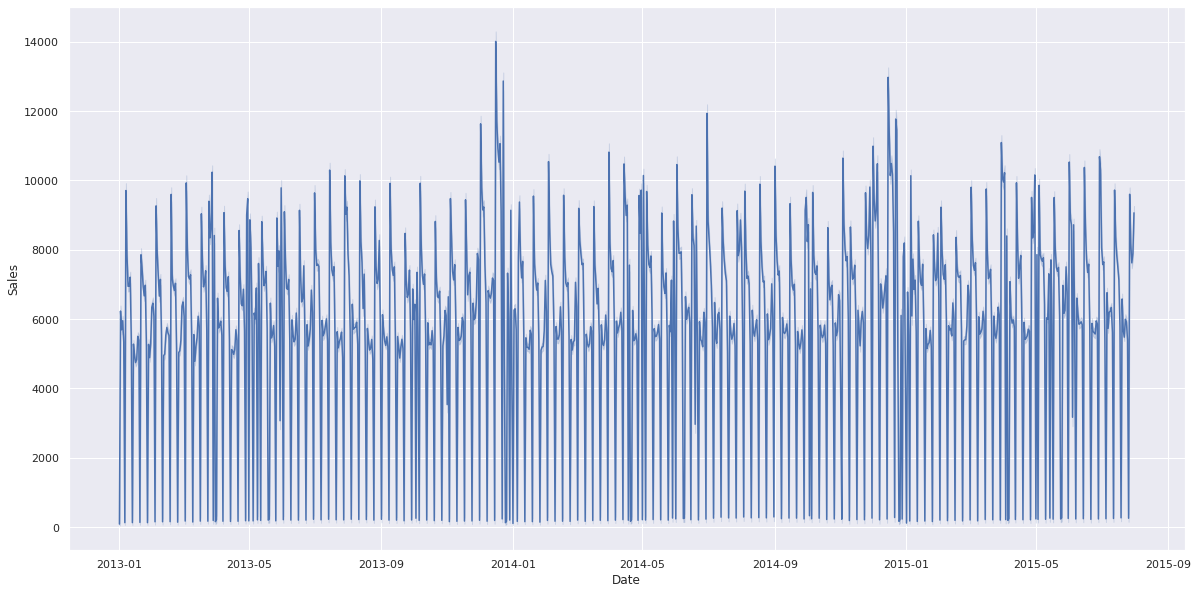

In [53]:
sns.lineplot(x = 'Date', y = 'Sales', data = demand, estimator = 'mean')

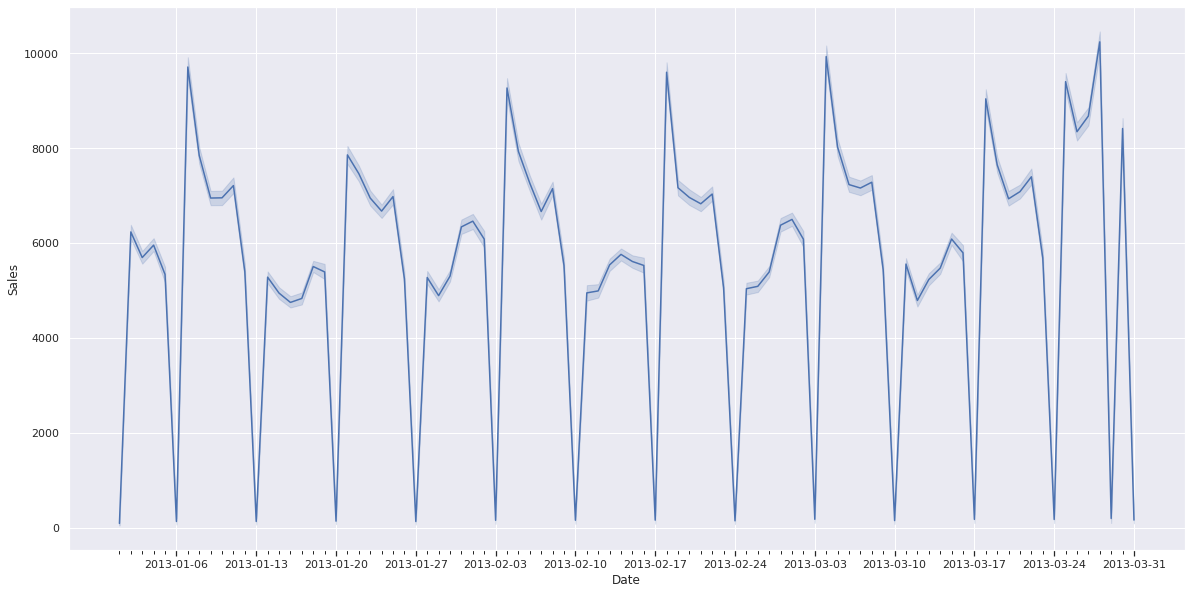

In [8]:
data = demand.loc['2013-01':'2013-03']
g = sns.lineplot(x = 'Date', y = 'Sales', data = data, estimator = 'mean')

g.tick_params(which="both", bottom=True)
_ = g.set_xticks(pd.date_range(start = data.index.min(), end = data.index.max(), freq = 'W'), minor = False)
_ = g.set_xticks(pd.date_range(start = data.index.min(), end = data.index.max(), freq = 'D'), minor = True)

### Autokorrelationsdiagramm

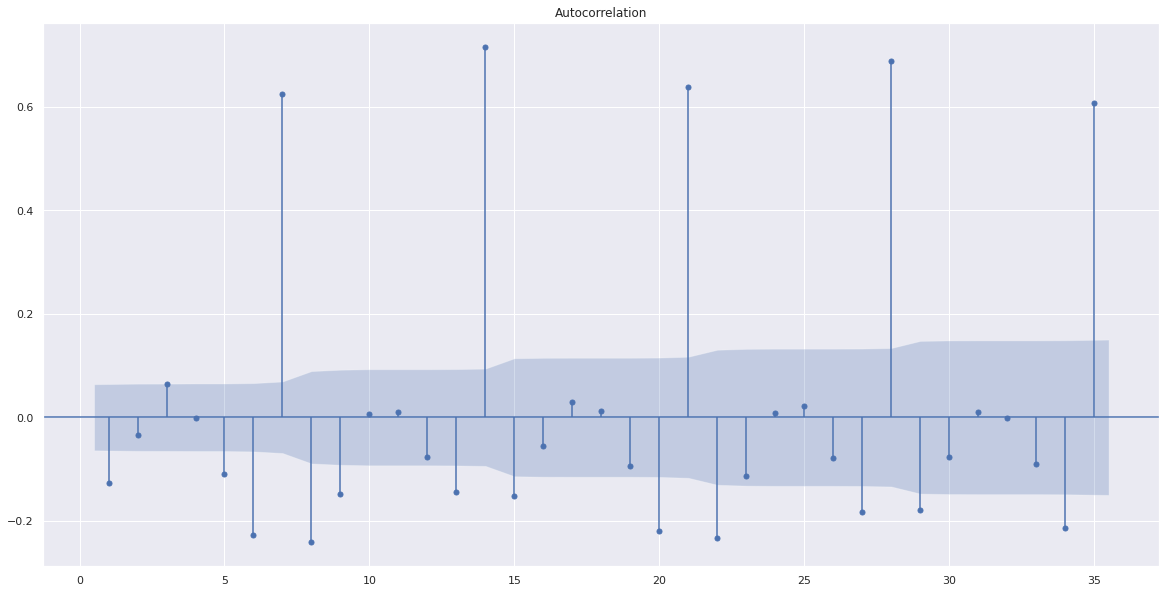

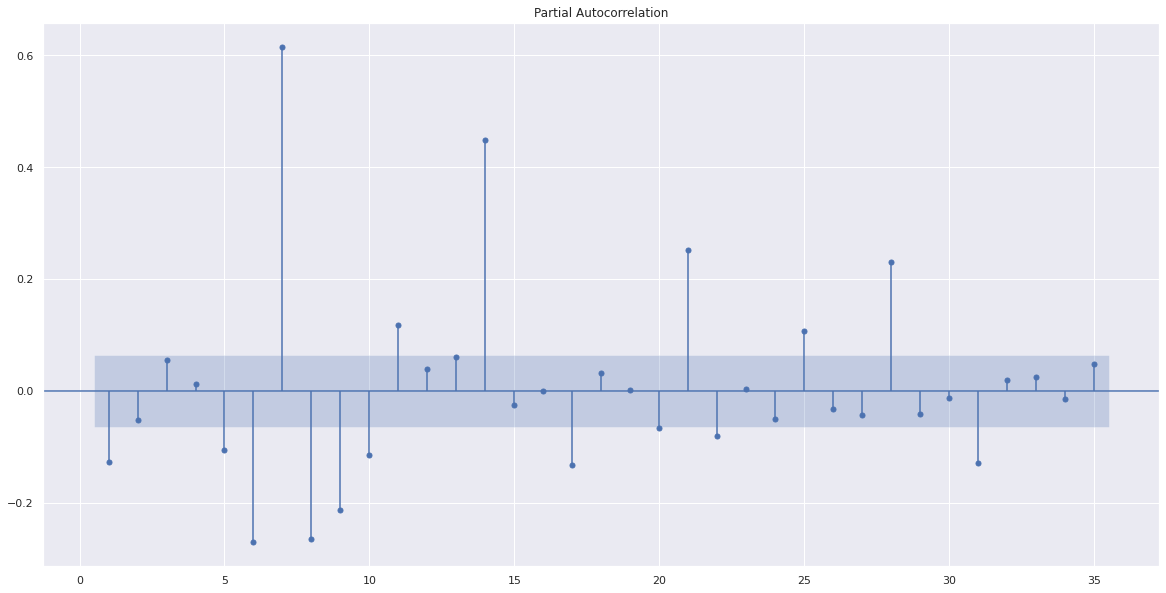

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

data = demand[demand.Store == 1]

plot_acf(data['Sales'], lags = 35, zero = False)
plt.show()
plot_pacf(data['Sales'], lags = 35, zero = False)
plt.show()

### Zerlegungsdiagramm

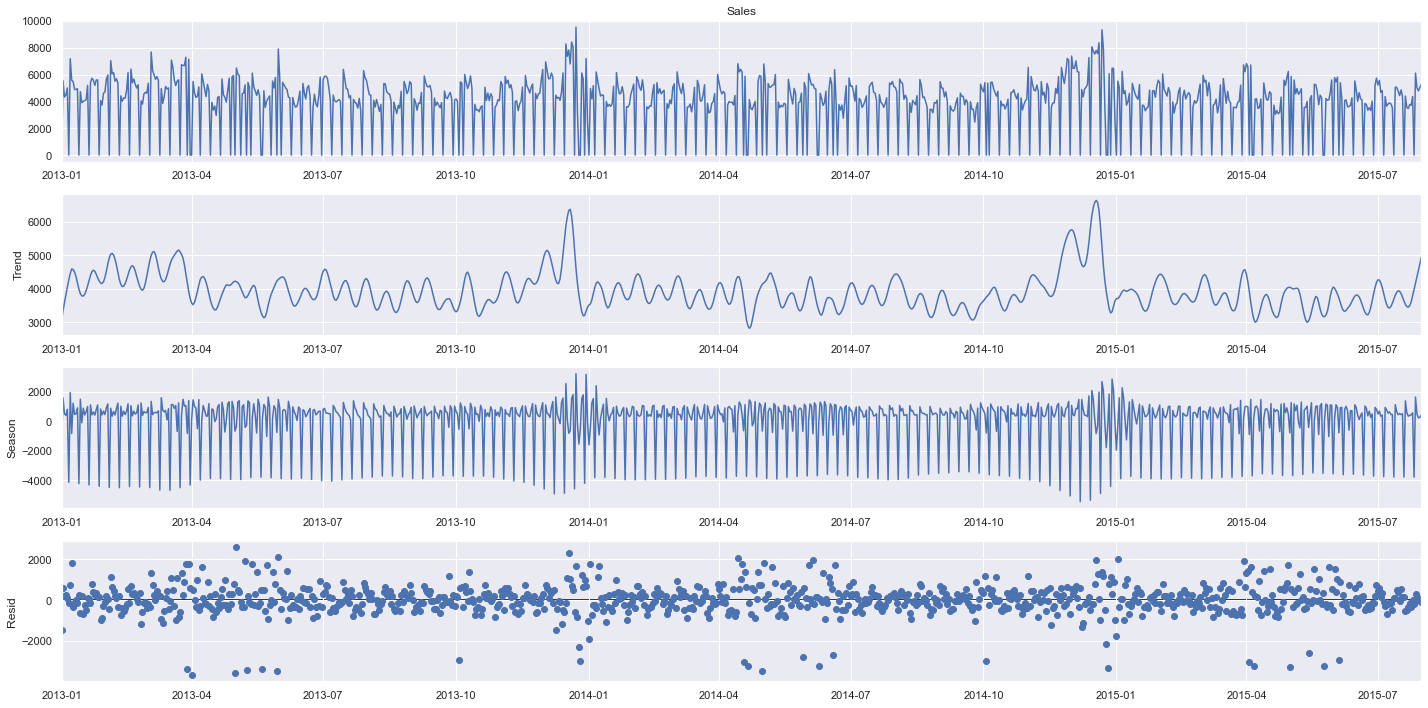

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

data = demand[demand.Store == 1]

decompose = STL(data['Sales']).fit()
decompose.plot()
plt.show()

### Exkurs: Erkennen von saisonalen Mustern

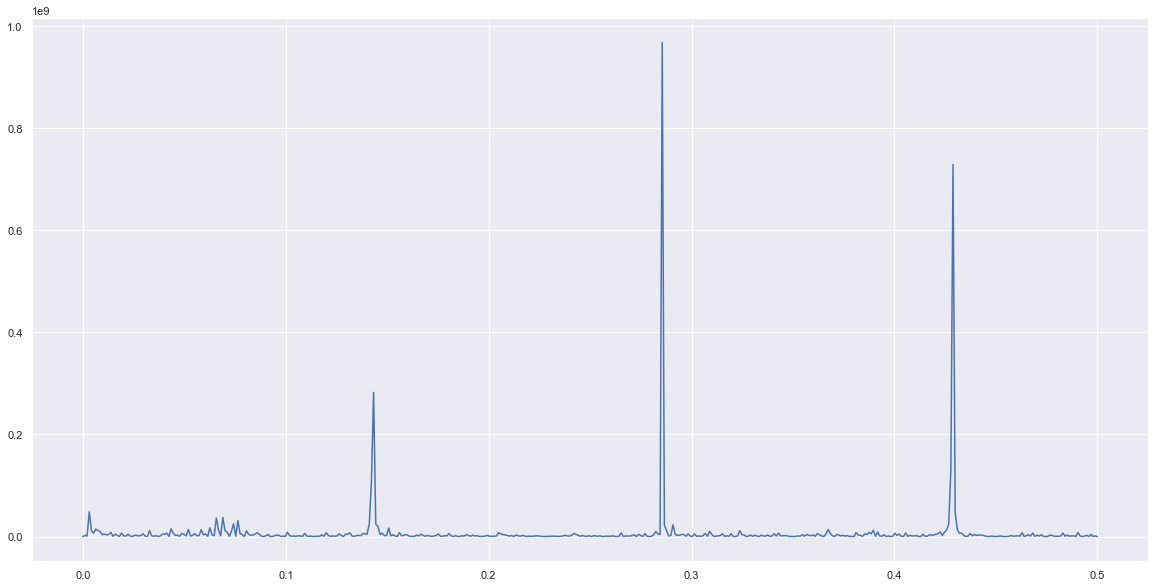

,freq,spec,season
269,0.285563,9.680065e+08,3.501859
404,0.428875,7.288371e+08,2.331683
135,0.143312,2.825834e+08,6.977778


In [66]:
from scipy import signal

f, Pxx_den = signal.periodogram(data['Sales'])
sns.lineplot(x = f, y = Pxx_den)
plt.show()

pgram = pd.DataFrame(data = {'freq' : f, 'spec' : Pxx_den})
pgram['season'] = 1 / pgram['freq']
display(pgram.sort_values(by = 'spec', ascending = False).head(3))

## Modellieren und Schätzen
## Autoregression

### Einfache Verfahren

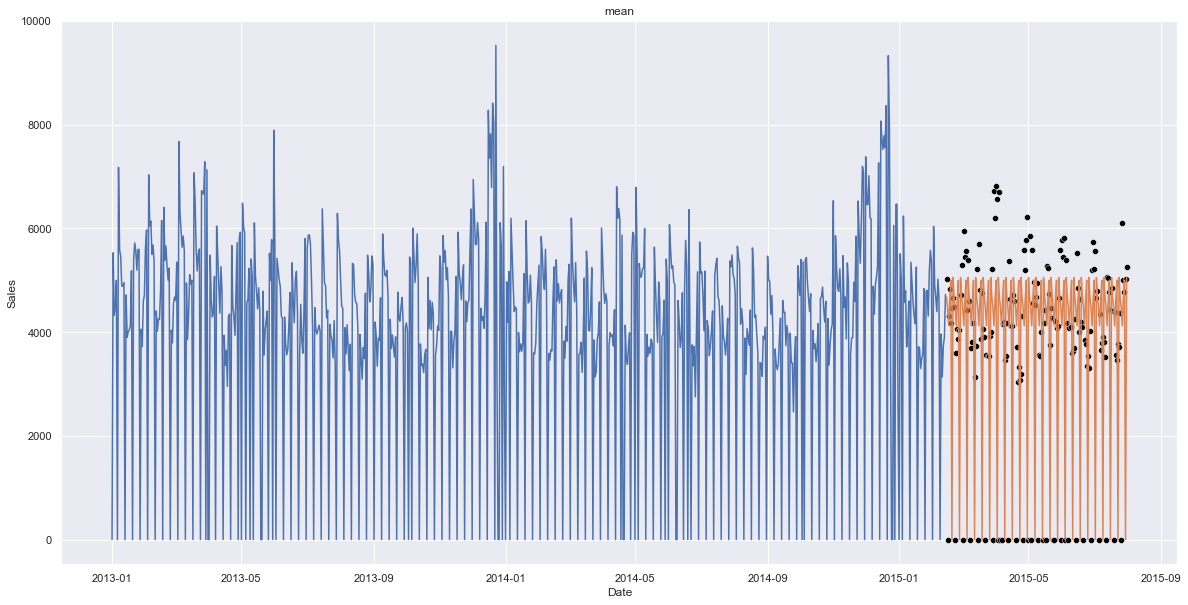

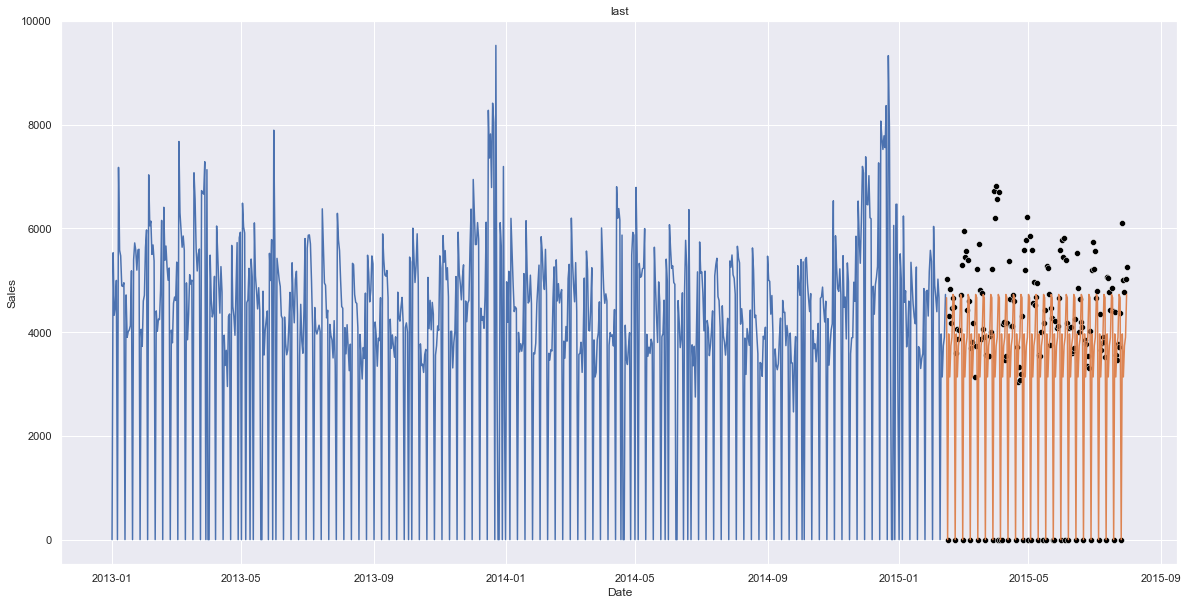

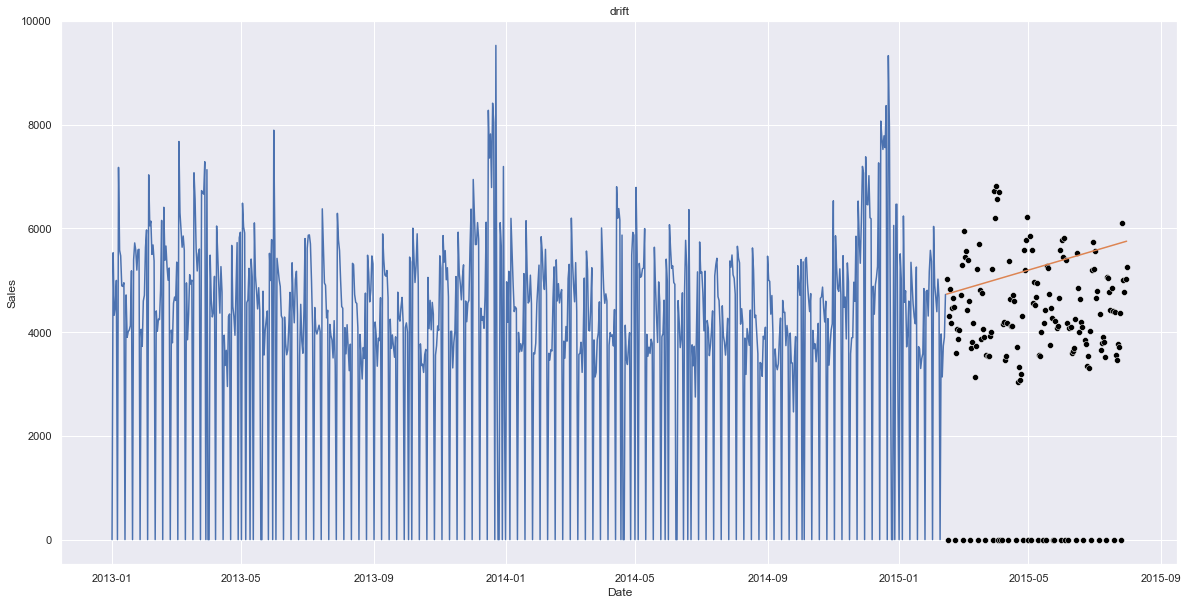

In [67]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 6*28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

for strategy in ['mean', 'last', 'drift']:
    if strategy == 'drift':
        forecast = NaiveForecaster(strategy = strategy)
    else:
        forecast = NaiveForecaster(strategy = strategy, sp = 7)
    forecast.fit(train['Sales'])
    
    sns.lineplot(data = train['Sales']).set_title('Naive')
    sns.scatterplot(data = test['Sales'], color = 'black')
    sns.lineplot(data = forecast.predict(fh))
    plt.title(strategy)
    plt.show()

### Exponentielle Glättung

C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


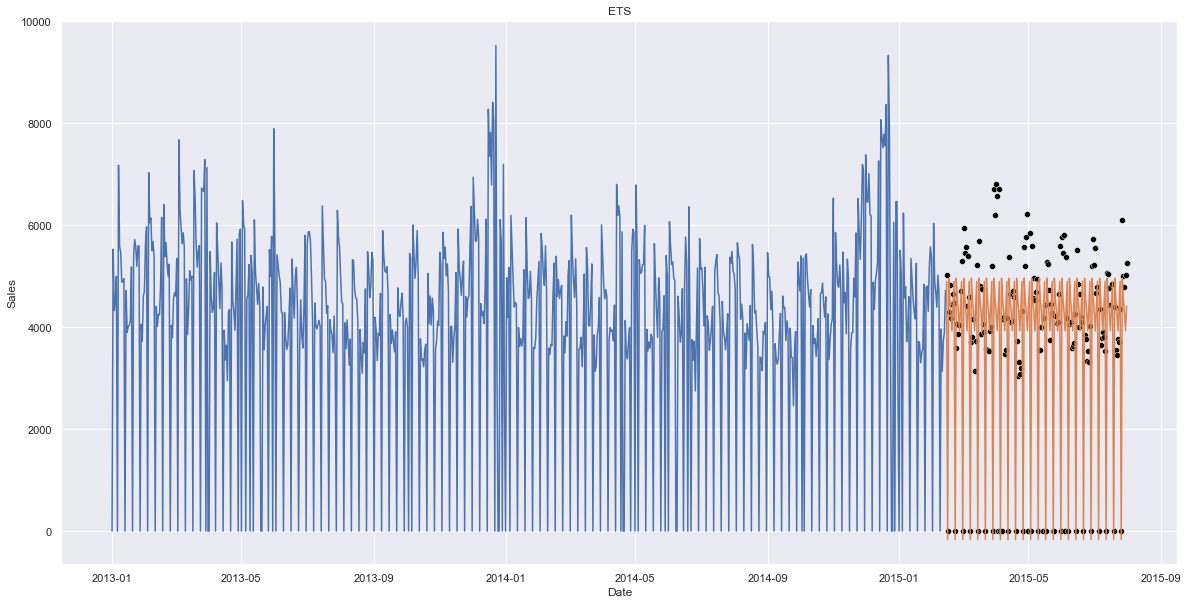

In [51]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 6*28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

forecast = ExponentialSmoothing(
        trend = None,
        seasonal = 'add',
        sp = 7
)

params = forecast.fit(train['Sales'])
   
sns.lineplot(data = train['Sales']).set_title('Naive')
sns.scatterplot(data = test['Sales'], color = 'black')
sns.lineplot(data = forecast.predict(fh))
plt.title("ETS")
plt.show()

### Machine Learning

#### Lineare Regression

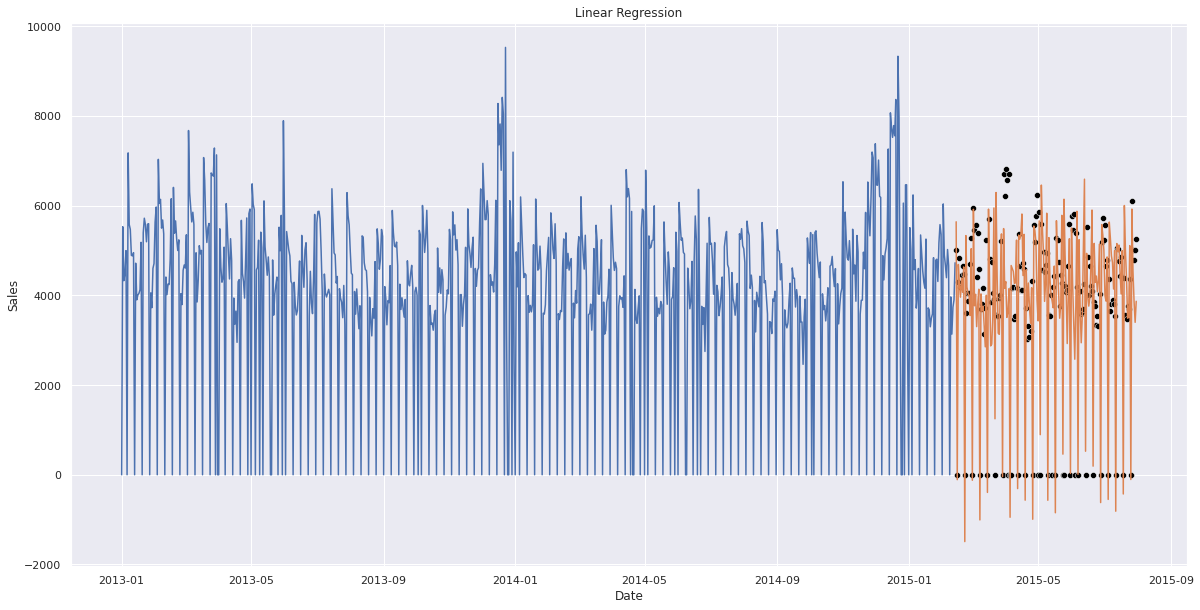

In [7]:
from sklearn.linear_model import LinearRegression
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 6*28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

reg = LinearRegression()
forecast = make_reduction(reg, window_length = 6*28, strategy = "recursive")

forecast.fit(train['Sales'])
   
sns.lineplot(data = train['Sales']).set_title('Naive')
sns.scatterplot(data = test['Sales'], color = 'black')
sns.lineplot(data = forecast.predict(fh))
plt.title('Linear Regression')
plt.show()

## Evaluieren
### Metriken

In [68]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error as MASE
from sktime.performance_metrics.forecasting import mean_squared_error as MSE
from sktime.performance_metrics.forecasting import mean_squared_scaled_error as MSSE

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 6*28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

forecast = {}
forecast['mean'] = NaiveForecaster(strategy = 'mean', sp = 7)
forecast['naive'] = NaiveForecaster(strategy = 'last', sp = 7)
forecast['drift'] = NaiveForecaster(strategy = 'drift')
forecast['ets'] = ExponentialSmoothing(trend = None, seasonal = 'add', sp = 7)
forecast['reg'] = make_reduction(LinearRegression(), window_length = 6*28, strategy = "recursive")

prediction = pd.DataFrame()
for model in ['mean', 'naive', 'drift', 'ets', 'reg']:
        prediction[model] = forecast[model].fit(train['Sales']).predict(fh)
#display(prediction)

metric_x_model = pd.DataFrame()
metric_x_model['MAE'] = prediction.apply(MAE, axis = 0, y_pred = test['Sales'])
metric_x_model['MASE'] = prediction.apply(MASE, axis = 0, y_pred = test['Sales'], y_train = train['Sales'])
metric_x_model['MSE'] = prediction.apply(MSE, axis = 0, y_pred = test['Sales'])
metric_x_model['MSSE'] = prediction.apply(MSSE, axis = 0, y_pred = test['Sales'], y_train = train['Sales'])


pd.options.display.float_format = '{:,.2f}'.format
display(metric_x_model.sort_values(by = 'MAE', ascending = True))

ImportError: cannot import name 'mean_absolute_error' from 'sktime.performance_metrics.forecasting' (C:\tools\Anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\__init__.py)

## Residualanalyse

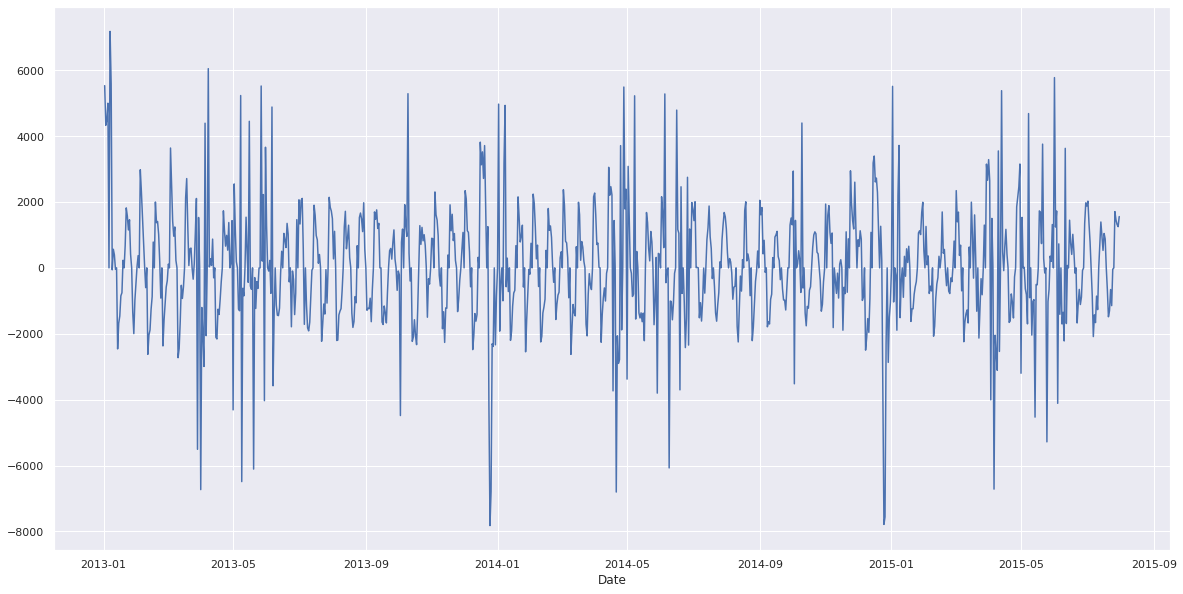

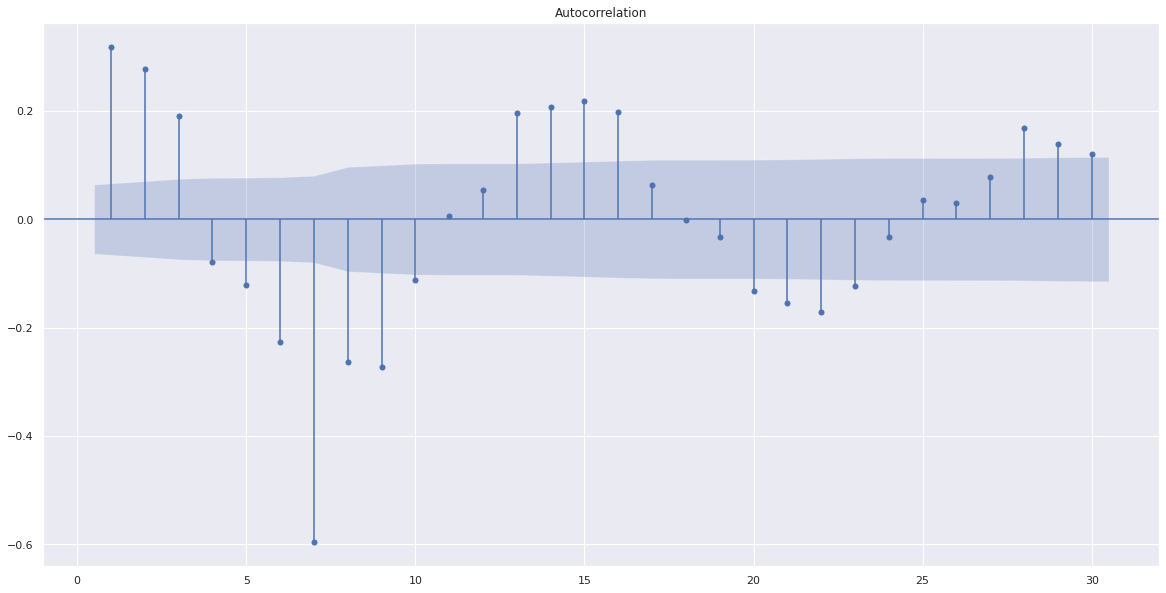

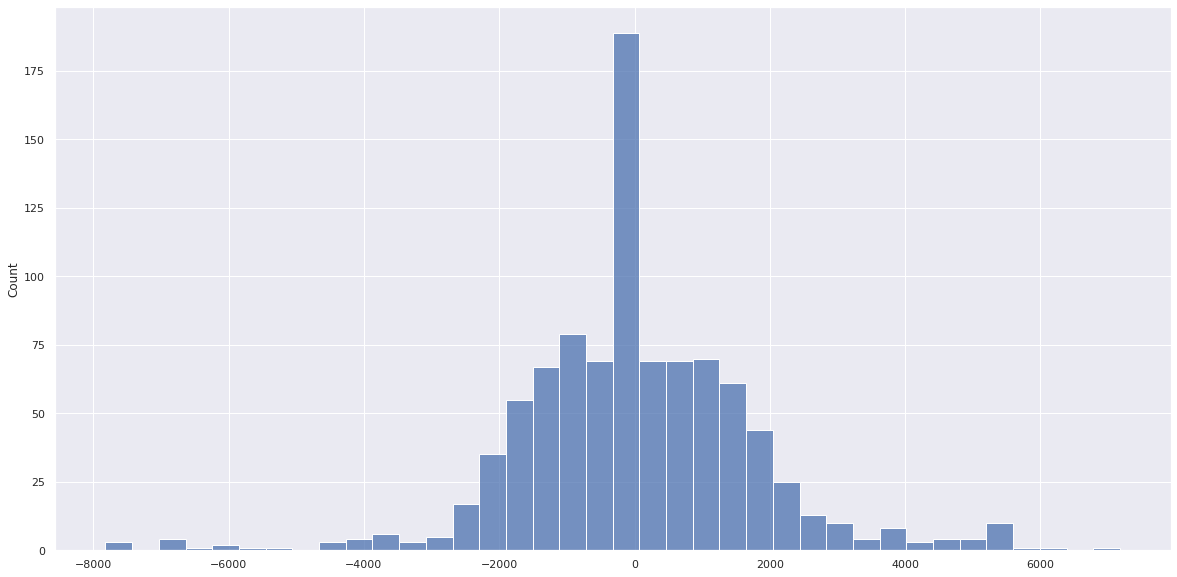

In [17]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.transformations.series.detrend import Detrender
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

data = demand[demand.Store == 1]
data.index.freq = 'D'

# forecast = NaiveForecaster(strategy = 'drift')
forecast = NaiveForecaster(strategy = 'last', sp = 7)
# forecast = ExponentialSmoothing(trend = None, seasonal = 'add', sp = 7)

transform = Detrender(forecaster = forecast)
residuals = transform.fit_transform(data['Sales'])

#display(residuals)

sns.lineplot(data = residuals)
plt.show
plot_acf(residuals.dropna(), zero = False)
plt.show()
sns.histplot(residuals)
plt.show()

### TBATS

In [69]:
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

data = demand[demand.Store == 1]
train, test = temporal_train_test_split(data, test_size = 6*28)

train.index.freq = 'D'
test.index.freq = 'D'
fh = ForecastingHorizon(test.index, is_relative = False)

forecast = TBATS()

forecast.fit(train['Sales'])
   
sns.lineplot(data = train['Sales']).set_title('Naive')
sns.scatterplot(data = test['Sales'], color = 'black')
sns.lineplot(data = forecast.predict(fh))
plt.title("ETS")
plt.show()

ModuleNotFoundError: No module named 'tbats'. 'tbats' is a soft dependency and not included in the sktime installation. Please run: `pip install tbats`. To install all soft dependencies, run: `pip install sktime[all_extras]`